In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage

# #10.2

## (a)

In [32]:
# Dissimilarity matrix
'''
The Dissimilarity matrix is a matrix that express the similarity pair to pair between to sets. It's square, and symmetric. The diagonal
members are defined as zero, meaning that zero is the measure of dissimilarity between an element and itself. Thus, the information the 
matrix holds can be seen as a triangular matrix.

Source: https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Clustering/Dissimilarity_Matrix_Calculation
'''
disMat = np.array([[0, 0.3, 0.4, 0.7],
                   [0.3, 0, 0.5, 0.8],
                   [0.4, 0.5, 0, 0.45],
                   [0.7, 0.8, 0.45, 0]])

In [33]:
# Linkage matrix
'''
To solve this problem, we can use SciPy, in particular the function 'scipy.cluster.hierarchy.linkage'. However, in contrast to R's 'hclust',
'linkage' is not able to deal directly with dissimilarity matrices. It's inputs must be a 1d compressed distance matrix or a 2d array of
observation vectors.
Since we don't have a 2d array of observations (samples x features), we must use the 1d compressed distance matrix. The 1d compressed matrix
has the distances between all the possible combinations of observations ((0,1), (0,2), (0,3), (1,2), (1,3), and (2,3)). Distances can be 
seen as a dissimilarity measure, as they express how different the observations are. Accordingly, to solve the exercise we just need to 
transform the dissimilarity matrix into a 1d compressed distance matrix and use it in the 'linkage' function. This can be done using the
'triu_indices' function, which returns the indices for the upper-triangle of an (n, m) array (remember that the dissimilarity matrix is a 
triangluar matrix).
'''
h, w = disMat.shape
z = linkage(disMat[np.triu_indices(h,1)], method='complete')

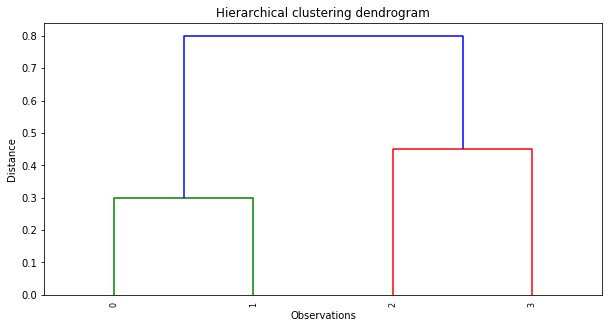

In [34]:
# Plot dendrogram
plt.figure(figsize=(10,5))
plt.title('Hierarchical clustering dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(z, leaf_rotation=90, leaf_font_size=8)
plt.show()

## (b)

In [35]:
# Linkage matrix
z = linkage(disMat[np.triu_indices(h,1)], method='single')

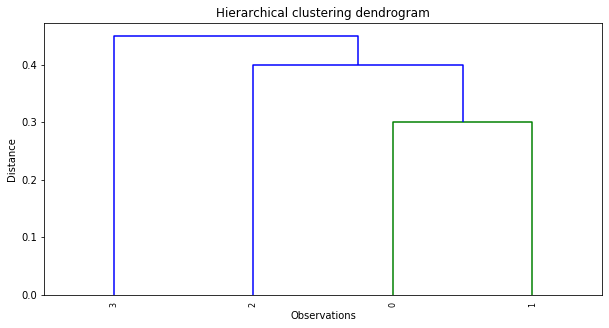

In [36]:
# Plot dendrogram
plt.figure(figsize=(10,5))
plt.title('Hierarchical clustering dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(z, leaf_rotation=90, leaf_font_size=8)
plt.show()

## (c)

In Cluster A we would have observations 0 and 1, while in Cluster B we would have observations 2 and 3.



## (d)

In Cluster A we would have observation 3, while in Cluster B we would have observations 2, 0 and 1.



## (e)

This question is just about graphical manipulation. Although in R it is easy to do this manipulation, we didn't find an equivalent way to do it in Python. Since the answer to this question doesn't add significant value in terms of clusters knowledge, we didn't decided not to solve it.



# #10.4

# (a)

We don't have enough information to tell. If all observations in cluster {1,2,3} and cluster {4,5} have the same pairwise distance, the fusion between these clusters occur at the same height on the tree. An example would be d(1,4)=d(1,5)=d(2,4)=d(2,5)=d(3,4)=d(2,5)=1, where d(x,y) denotes the distance between observation x and observation y.

In contrast, if observations between clusters have different distances, the fusion will occur higher on the complete linkage. For example, if d(1,4)=1, d(1,5)=2, d(2,4)=3, d(2,5)=4, d(3,4)=5, and d(3,5)=6, single linkage would fuse at height 1 and complete linkage at height 6.



# (b)

They fuse at the same height. The distance between two observations is unique. Thus, the smallest and largest pairwise distance are the same and the will fuse at the same height.

# #10.6

When we say that a variable 'explains 10% of the variation', we are talking about the variable's capacity to distinguish different observations.

Imagine that you want to move out of your parents house and you're trying to buy a new house. You go to the real estate agency and they show you a set of houses that you could like. Since we live in a capitalist world, the first thing that you'll try to do is to determine the price of each house. Imagine that each house is described by it's location, condition and area. For example, house H1 is in location A, its condition is 'Good', and it has 50 m2 (H1=(A,'Good',50)). The remaining ones can be described like this: H2=(A,'Bad',500) and H3=(A,'Good',5000).

In this case, location would be a variable that doesn't allow us to distinguish the houses. All houses have the same exact location, so that it's not possibile to distinguish, for example, H1 from H2 just based on the location. Thus, the location can't explain why prices are different. This means that its explanatory power is reduced (it doesn't explains the variation that we have between the different observations).

In contrast, since all the houses have different areas, area could be a good explanatory variable. If someone asks you which house has 50 m2, you can confidently say 'H1!'. This means that area gives you enough information to distinguish the observations. Accordingly, we can say that it is able to explain the variation.

To conclude, just remember that the first principal component considered in this exercise explains 10% of the variation. There are still 90% of the variation to be explained or, by other words, 90% of the information is missing if we just consider the first principal component.



# #10.8

In [5]:
#Read dataset from R
USArrest = sm.datasets.get_rdataset("USArrests","datasets").data

In [6]:
# Scale data (standardize)
scl = StandardScaler()
USArrest_scl = scl.fit_transform(USArrest)

## (a)

In [7]:
# PCA
pca = PCA()
pca.fit(USArrest_scl)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# Proportion of variance explained
# This is equivalent to do sdev output of the prcomp() function in R.
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

## (b)

In [10]:
# Loadings of the principal components
# Rows are the loading vectors (see References)
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [11]:
# Centered and scaled variables
# In (a) we used centered ans scaled variables, so we should use the same data here.
USArrest_scl

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [13]:
# Application of Equation 10.8

for k in range(0,np.shape(pca.components_)[1]):
    # Numerator
    accum = 0
    num = 0
    for i in range(0, np.shape(USArrest_scl)[0]):
        for j in range(0, np.shape(USArrest_scl)[1]):
            accum += pca.components_[k][j] * USArrest_scl[i][j]
        num += accum**2
        accum = 0

    # Denominator
    accum = 0
    den = 0
    for j in range(0, np.shape(USArrest_scl)[1]):
        for i in range(0, np.shape(USArrest_scl)[0]):
            accum += USArrest_scl[i][j]**2
        den += accum
        accum = 0

    # Result
    print('principal component number:', k+1)
    print(num/den)

principal component number: 1
0.6200603947873732
principal component number: 2
0.24744128813496016
principal component number: 3
0.08914079514520745
principal component number: 4
0.0433575219324588


# #10.10

## (a)

In [15]:
# Generate dataset
# scikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity.
# make_blobs provides greater control regarding the centers and standard deviations of clusters, and is used to demonstrate clustering.
X, y = make_blobs(n_samples=60, n_features=50, centers=3, cluster_std=5, random_state=1)

## (b)

In [16]:
# PCA 
# We are looking for the first two principal components, so n_components=2.
pca = PCA(n_components=2, random_state=1)
X_r = pca.fit_transform(X)

Text(0, 0.5, 'Second principal component')

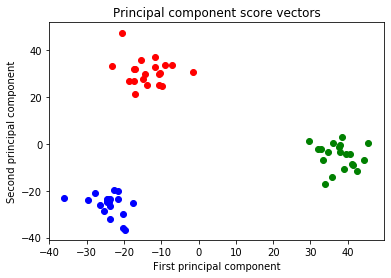

In [17]:
# Plot
plt.figure()
colors = ['blue', 'red', 'green']

for color, i in zip(colors, [0,1,2]):
    plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color=color)
plt.title('Principal component score vectors')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

## (c)

In [18]:
# Get clustering labels using K-means
km3 = KMeans(n_clusters=3)
km3.fit(X)
km3.labels_

array([2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2], dtype=int32)

In [19]:
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

## (d)

In [20]:
# Get clustering labels using K-means
km3 = KMeans(n_clusters=2)
km3.fit(X)
km3.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

In [21]:
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

In this case, we only have two clustering labels. The results above show that when:

Clustering label is 0 --> true class label can be 0 or 1.
Clustering label is 1 --> true class label is 2;
This means that when K-means is equal to 2, we are merging the labels 0 and 1. Thus, we can say that label 2 corresponds to a finer set of observations.

## (e)

In [22]:
# Get clustering labels using K-means
km3 = KMeans(n_clusters=4)
km3.fit(X)
km3.labels_

array([2, 3, 0, 1, 3, 3, 2, 2, 2, 3, 3, 1, 2, 3, 0, 2, 0, 0, 2, 3, 2, 1,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 3,
       3, 2, 2, 2, 1, 2, 3, 1, 0, 0, 2, 0, 2, 1, 0, 2], dtype=int32)

In [23]:
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

We can conclude that the original cluster 1 (true label = 1), was split into two different clusters (clustering labels 1 and 3). The remaining clusters didn't have any significant change. This is an expected result, since the only coherent way to create a new cluster would be to split one of the original clusters, while remaining the other two unchanged.



## (f)

In [24]:
# Get clustering labels using K-means
km3 = KMeans(n_clusters=3)
km3.fit(X_r)
km3.labels_

array([0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0], dtype=int32)

In [25]:
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

The results show that, apart from the correspondences, true and clustering labels match perfectly. This means that the two principal components were able to reduce dimensionsal space without loss of information.



## (g)

In [27]:
# Scale variables
# Data will be scaled to unit variance but it will not be centered (mean will not be removed).
X_scaler = StandardScaler(with_mean=False)
X_scl = X_scaler.fit_transform(X)

In [28]:
# Get clustering labels using K-means
km3 = KMeans(n_clusters=3)
km3.fit(X_scl)
km3.labels_

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0], dtype=int32)

In [29]:
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

As in the previous cases, apart from the correspondence between clustering and true class, the labels match perfectly. However, it should be noted that this is not an obvious result. The k-means algorithm is sensitive to the scale of the variables. Standardizing the observations can have a strong impact on the results obtained. Accordingly, it could have happened that the clustering and the true class didn't match.

The decision about standardizing or not the variables depends on the data. In a real case, we should look for different choices and go for the one that give us the most interpretable solution or the most useful solution.